<a href="https://colab.research.google.com/github/nicocrozier/mnist/blob/main/mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install --upgrade tensorflow
!pip install matplotlib

Requirement already up-to-date: tensorflow in /usr/local/lib/python3.6/dist-packages (2.4.1)


In [ ]:
import tensorflow as tf

mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

# normalise/ scale data between 0-1 instead of 1 -256
x_train = tf.keras.utils.normalize(x_train, axis = 1)
x_test = tf.keras.utils.normalize(x_test, axis = 1)

# build the model/ Sequential model, feed forward.
model = tf.keras.models.Sequential()

# Input layer: Flaten the layers, 2d, if we were doing geographic data, wouldn't want to flatten.
model.add(tf.keras.layers.Flatten())

# 2 Hidden layers, Dense(# of neurons, sigmoid or stepper function or relu func)
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))

# Output layer: Dense(# of classifications*0-9 = 10, probability distibution)
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

# Parameters for training the model, loss = what you get wrong, NN doesn't maximize accurcy it minimizes loss
# 'adam' is the defult optimizer like relu, 10 more in Keras
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, epochs=3)




11493376/11490434 [==============================] - 0s 0us/step
Epoch 1/3
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4741 - accuracy: 0.8662
Epoch 2/3
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1183 - accuracy: 0.9637
Epoch 3/3
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0753 - accuracy: 0.9756


In [ ]:
val_loss, val_acc = model.evaluate(x_test, y_test)
print(val_loss, val_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.0994 - accuracy: 0.9697
0.09942564368247986 0.9696999788284302


In [ ]:
# save the model
model.save('mnist_1.model')

INFO:tensorflow:Assets written to: mnist_1.model/assets


In [ ]:
# Loading a new model
new_model = tf.keras.models.load_model('mnist_1.model')

In [ ]:
# if we wanted to make a new model
# *** Always takes a list
predictions = new_model.predict([x_test])
print(predictions)

[[1.5895328e-07 3.5044341e-06 3.6374366e-04 ... 9.9727148e-01
  1.2385159e-06 1.5357082e-05]
 [1.9704293e-08 3.4714688e-03 9.9651426e-01 ... 1.1461211e-08
  1.3611500e-06 6.3849432e-09]
 [2.8599818e-09 9.9995852e-01 2.5846989e-06 ... 1.8246477e-05
  1.2169597e-05 1.9543114e-07]
 ...
 [3.3622574e-09 5.0495419e-07 7.8346334e-09 ... 2.4839659e-05
  1.1169141e-05 1.3768504e-04]
 [7.2152329e-06 7.3155188e-06 8.1930580e-07 ... 1.2590017e-06
  1.2241274e-03 4.3477147e-08]
 [2.7711612e-05 6.0365221e-07 7.4781869e-06 ... 2.8170535e-09
  5.0046265e-06 2.3787313e-08]]


In [ ]:
import numpy as np
print(np.argmax(predictions[0]))

7


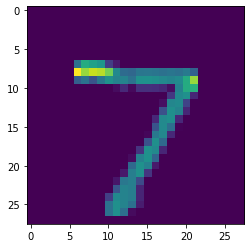

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(x_test[0])
plt.show()

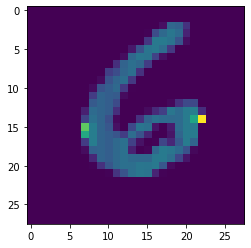

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.03983807
  0.32824827 0.30708319 0.14702016 0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.       

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(x_train[90])
plt.show()
print(x_train[90])
